# Homework 05

### Task 1

Write your own Simpson method to numerically calculate integral 

`my_simps(some_func,a,b,n)`
* some_func
* a: left limit 
* b: right limit
* n: number of segments
for example:

#### for any a,b,n, func

### example

In [127]:
import numpy as np
def some_func(x):
    return np.exp(x)

In [128]:
a=1.5
b=2.5
n=4

In [129]:
def my_simps(some_func,a,b,n):
    #  your code here

    f=some_func

    x=np.linspace(a,b,n)
    
    #Se inicializa la suma tomando la suma de los valores extremos. 
    s=f(x[0])+f(x[-1])

    #Luego se suma selectivamente según sean pares o impares los términos intermedios

    for i in range(1,len(x)-1,1):
        if i%2==0 :
          s=s+2*f(x[i])
        elif i%2==1 :
          s=s+4*f(x[i])

    #Se añade a la suma una relación de escala and voilá

    I=s*(b-a)/(3*n)

    #I=7.7#...
    return I

In [130]:
I=my_simps(some_func,a,b,n)
print(I)

4.928438630518926


Sin embargo, la aproximación haciendo uso de solo cuatro intervalos es muy pobre. La función exponencial es particularmente dificil de tratar a través de métodos polinomiales debido a su elevada razón de cambio a medida que los valores de $x$ aumentan. El valor teórico que debería proporcionar esta integral es 
$ \
\int_{3/2}^{5/2}  \! e^{x} \, dx = e^{5/2}-e^{3/2} ≈ 7.7008048903654 ≈7.7
\
$

A fin de obtener un resultado con una mejor precisión. Se intentará para el caso de 100, 1000, 10000 y 100000 intervalos. 

In [131]:
n=10 #Porque n traía el valor de n=4 desde las celdas anteriores, hay que redefinirlo. 

for i in range(1,5,1):
  n=n*10
  I=my_simps(some_func,a,b,n)
  print(f"La integración usando {n} intervalos produce el resultado:")
  print(I)

La integración usando 100 intervalos produce el resultado:
7.583393619447458
La integración usando 1000 intervalos produce el resultado:
7.6890452866027905
La integración usando 10000 intervalos produce el resultado:
7.699628747050568
La integración usando 100000 intervalos produce el resultado:
7.7006872742064125


Nótese que se requirieron 100000 intervalos para obtener una aproximación a cuatro cifras significativas al valor real. Particularmente la función exponencial es exigente computacionalmente. 
Una manera más interesante, de implementar el código anterior es a través de una condición de parada que exprese la tolerancia de cifras decimales requerida, para eso sea Io (old) la integral obtenida en la iteración anterior. 
Si al evaluar la integral, con dos órdenes de magnitud distintos de subintervalos, la diferencia en las aproximaciones es menor a la tolerancia, la aproximación obtenida tiene que ser buena. 

In [132]:
n=10 #Nuevamente requiere redefinirse
eps=1e-4    #Añadimos una tolerancia a la solución
Io=my_simps(some_func,a,b,n)

I=my_simps(some_func,a,b,n*10)

r=I-Io    #Se inicializa la diferencia entre las dos iteraciones.
c=0       #Y un contador para la cantidad de iteraciones necesarias. 

while np.abs(r)>= eps:
  
  c=c+1

  n = n*10
  I = my_simps(some_func,a,b,n)

  r=I-Io

  if np.abs(r)<eps :
    print(f"La integración usando {n} intervalos produce el resultado:")
    print(round(I,4))
    print("Con un margen de error de", eps, "con respecto al valor real. ")
    print("Se requierieron además", c, "iteraciones para obtener este resultado. ")

  Io=I

La integración usando 10000000 intervalos produce el resultado:
7.7008
Con un margen de error de 0.0001 con respecto al valor real. 
Se requierieron además 6 iteraciones para obtener este resultado. 


Este resultado si es ahora suficiente conveniente. A pesar de que entristece el hecho de que para tantos subintervalos el tiempo de computación es elevado. 

### Task 2

Solve the following integral numerically

$$I = \int_{1}^{9} \frac{b x^2 + x^2 \sqrt(x) - 1}{x^2} dx$$

Initially b=2

Then make a plot for $I$ vs 10 different values of b=[0,1,2,3,4,5,6,7,8,9] 

Mientras nadie me diga lo contrario, y conociendo la función del integrando, la alternativa ganadora es utilizar los métodos optimizados de la librería Scipy

In [133]:
from scipy.integrate import quad

Definimos la función del integrando

In [134]:
def integrand(x,b):
  y = (b*x**2+(x**2)*(np.sqrt(x))-1)/(x**2)
  return y

Y procedemos a integrar. 

In [135]:
b = 2
x0 = 1
xf = 9

func = integrand
I, error = quad(func,x0,xf,args=(b,))

print("El valor de la integral es:")
print(I,"±",error)

El valor de la integral es:
32.44444444444443 ± 6.278273582403283e-08


Ahora puede utilizarse esta función integral para evaluar estas integrales definidas como funciones de $b$, sea entonces

$$ F(b) = \int_{1}^{9} \frac{b x^2 + x^2 \sqrt(x) - 1}{x^2} dx $$

Realizemos una gráfica de la función en el dominio $b=[0,1,2,3,4,5,6,7,8,9]$

In [136]:
b=[0,1,2,3,4,5,6,7,8,9]

F=[]
errors=[]

for k in b:
  I, error = quad(func,x0,xf,args=(k,))
  F.append(I)
  errors.append(error)

F=np.array(F)
e=np.array(errors)

In [137]:
import matplotlib.pyplot as plt


Text(0, 0.5, '$F(b)$')

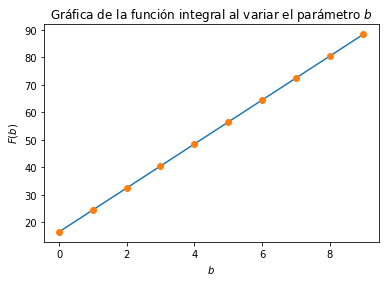

In [138]:
fig , ax = plt.subplots(1,1)
ax.plot(b,F)
ax.plot(b,F, 'o')
ax.set_title("Gráfica de la función integral al variar el parámetro $b$")
ax.set_xlabel("$b$")
ax.set_ylabel("$F(b)$")

Es entonces la gráfica solicitada. 

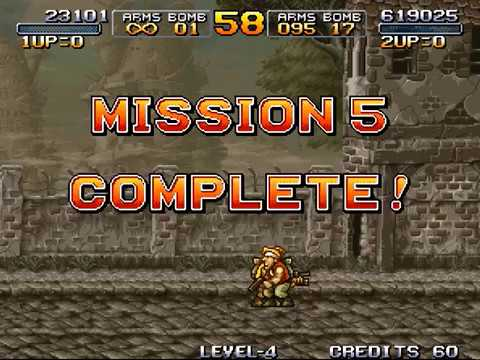